In [1]:
#Install kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d alessiocorrado99/animals10

!unzip '/content/animals10.zip'

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [3]:
#mengubah nama folder
import os,sys

%cd raw-img
os.rename("cane", "dog")
os.rename("cavallo", "horse")
os.rename("elefante", "elephant")
os.rename("farfalla", "butterfly")
os.rename("gallina", "chicken")
os.rename("gatto", "cat")
os.rename("mucca", "cow")
os.rename("pecora", "sheep")
os.rename("ragno", "spider")
os.rename("scoiattolo", "squirrel")

[Errno 2] No such file or directory: 'raw-img'
/content/raw-img


In [5]:
#install package
!pip install split_folders

In [6]:
import splitfolders as sp

#split dataset
sp.ratio('/content/raw-img', output='/content/img', seed=1, ratio=(.8, .2))

Copying files: 26179 files [00:06, 3909.29 files/s]


In [7]:
base_dir = '/content/img'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
os.listdir('/content/img/train')

['dog',
 'chicken',
 'horse',
 'sheep',
 'elephant',
 'squirrel',
 'cow',
 'cat',
 'spider',
 'butterfly']

In [9]:
os.listdir('/content/img/val')

['dog',
 'chicken',
 'horse',
 'sheep',
 'elephant',
 'squirrel',
 'cow',
 'cat',
 'spider',
 'butterfly']

In [14]:
train_dog = os.path.join(train_dir, 'dog')
train_chicken = os.path.join(train_dir, 'chicken')
train_horse = os.path.join(train_dir, 'horse')
train_sheep = os.path.join(train_dir, 'sheep')
train_elephant = os.path.join(train_dir, 'elephant')
train_squirrel = os.path.join(train_dir, 'squirrel')
train_cow = os.path.join(train_dir, 'cow')
train_cat = os.path.join(train_dir, 'cat')
train_spider = os.path.join(train_dir, 'spider')
train_butterfly = os.path.join(train_dir, 'butterfly')


val_dog = os.path.join(validation_dir, 'dog')
val_chicken = os.path.join(validation_dir, 'chicken')
val_horse = os.path.join(validation_dir, 'horse')
val_sheep = os.path.join(validation_dir, 'sheep')
val_elephant = os.path.join(validation_dir, 'elephant')
val_squirrel = os.path.join(validation_dir, 'squirrel')
val_cow = os.path.join(validation_dir, 'cow')
val_cat = os.path.join(validation_dir, 'cat')
val_spider = os.path.join(validation_dir, 'spider')
val_butterfly = os.path.join(validation_dir, 'butterfly')

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=0.2,
    fill_mode='nearest'
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
)

Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


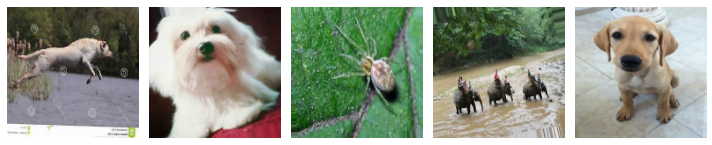

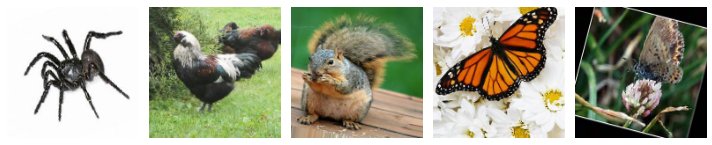

In [24]:
import matplotlib.pyplot as plt

#Melihat contoh data
ex_img_train, _ = next(train_generator)
ex_img_val, _ = next(validation_generator)

def showImg(img_arr):
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  axes = axes.flatten()

  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

showImg(ex_img_train[:5])
showImg(ex_img_val[:5])

In [32]:
from tensorflow.keras import applications, optimizers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPool2D, Dense

epochs = 25
learning_rate1 = 0.001
decay_rate = learning_rate / epochs
momentum =0.9
sgd= optimizers.SGD(learning_rate=learning_rate1, momentum=momentum,
                      decay=decay_rate, nesterov=False)

base_model1 = applications.VGG16(weights='imagenet', include_top=False,
                                    input_shape=(150,150,3))
model1 = Sequential()
model1.add(Flatten(input_shape= base_model1.output_shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

vgg16_model = Model(inputs=base_model1.input,
                        outputs=model1(base_model1.output))

vgg16_model.compile(loss='binary_crossentropy',
                        optimizer=sgd,metrics=['accuracy'])

vgg16_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [33]:
batch_size =32 
epochs = 25  
history = vgg16_model.fit_generator(train_generator,
                    epochs=epochs,validation_data=validation_generator,
                    callbacks=[ModelCheckpoint('VGG16-transferlearning.model',
                               monitor='val_acc')])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
655/655 [==============================] - 363s 496ms/step - loss: 0.1600 - accuracy: 0.6834 - val_loss: 0.1014 - val_accuracy: 0.8161
INFO:tensorflow:Assets written to: VGG16-transferlearning.model/assets
Epoch 2/25
655/655 [==============================] - 318s 486ms/step - loss: 0.0785 - accuracy: 0.8669 - val_loss: 0.0690 - val_accuracy: 0.8842
INFO:tensorflow:Assets written to: VGG16-transferlearning.model/assets
Epoch 3/25
655/655 [==============================] - 317s 483ms/step - loss: 0.0607 - accuracy: 0.9004 - val_loss: 0.0592 - val_accuracy: 0.9002
INFO:tensorflow:Assets written to: VGG16-transferlearning.model/assets
Epoch 4/25
655/655 [==============================] - 318s 485ms/step - loss: 0.0504 - accuracy: 0.9192 - val_loss: 0.0547 - val_accuracy: 0.9069
INFO:tensorflow:Assets written to: VGG16-transferlearning.model/assets
Epoch 5/25
655/655 [==============================] - 318s 485ms/step - loss: 0.0441 - accuracy: 0.9315 - val_loss: 0.0514 - val_acc

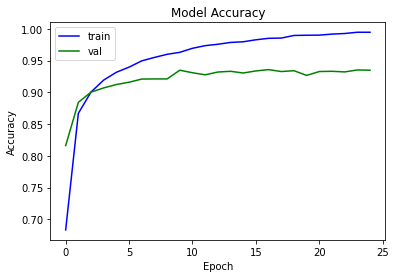

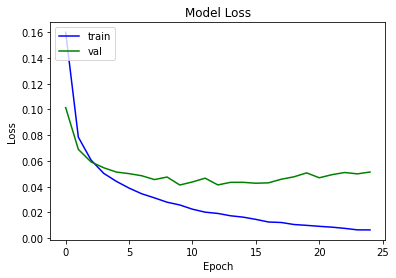

In [34]:
akurasi = history.history['accuracy']
val_akurasi = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Menampilakan tingkat akurasi
plt.plot(akurasi, color='blue')
plt.plot(val_akurasi, color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Menampilkan tingkat loss
plt.plot(loss, color='blue')
plt.plot(val_loss, color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
#convert model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/raw-img/VGG16-transferlearning.model/')
tflite_model = converter.convert()

#save model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)